In [10]:
import os
import base64
import requests
import random
import subprocess
import time

from IPython.display import display, Image

ENDPOINT_ID = "7227045948906536960"
PROJECT_ID = "vision-ml-first-test"

# This is cheating!!! Instead create an access key and store it in a key store!!!
GCLOUD_ACCESS_TOKEN = subprocess.check_output("gcloud auth print-access-token", shell=True).strip()

HEADERS = {'Authorization': "Bearer " + GCLOUD_ACCESS_TOKEN, 'Content-Type': 'application/json'}

END_POINT = "https://us-central1-prediction-aiplatform.googleapis.com/v1alpha1/projects/" + \
            PROJECT_ID + \
            "/locations/us-central1/endpoints/" + \
            ENDPOINT_ID + ":predict"

image_dir = "images"
IMAGE_COUNT = 10

REQ_TEMPLATE = '{ \
  "instances": [{ \
    "content": "REQUEST_DATA" \
  }], \
  "parameters": { \
    "confidenceThreshold": 0.5, \
    "maxPredictions": 5\
  }\
}'


dog.7061.jpg Dog Confidence = 0.997360885 Took 0.428 Seconds


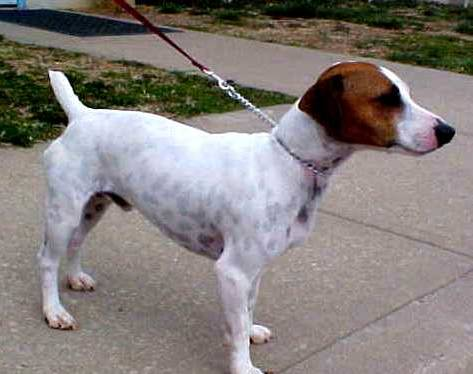

cat.8333.jpg Cat Confidence = 0.988645673 Took 0.475 Seconds


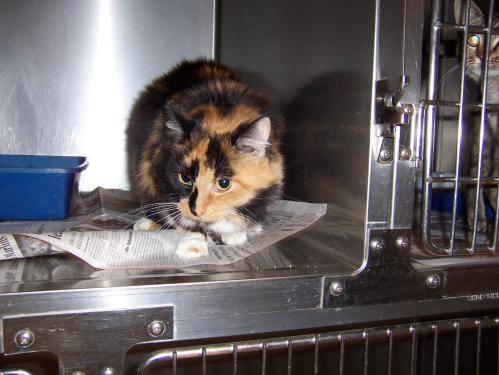

dog.4085.jpg Dog Confidence = 0.96463269 Took 0.414 Seconds


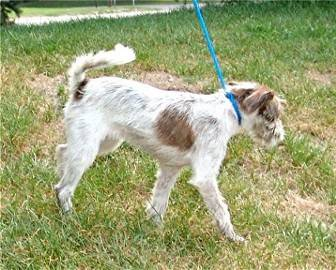

dog.5967.jpg Dog Confidence = 0.975701153 Took 0.392 Seconds


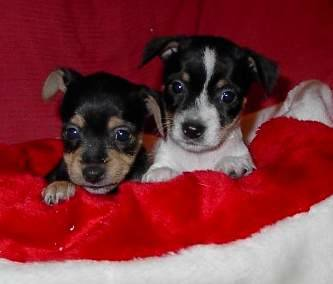

dog.11209.jpg Dog Confidence = 0.99887985 Took 0.423 Seconds


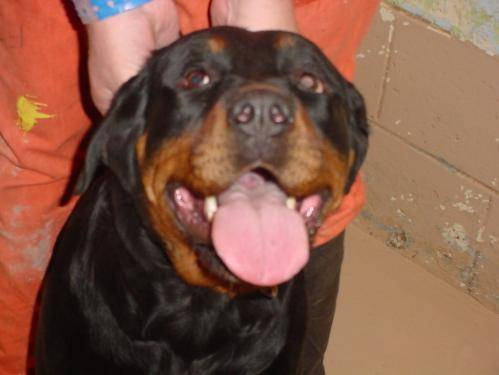

cat.1831.jpg Cat Confidence = 0.995771587 Took 0.361 Seconds


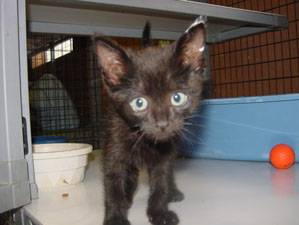

cat.9979.jpg Cat Confidence = 0.994687915 Took 0.434 Seconds


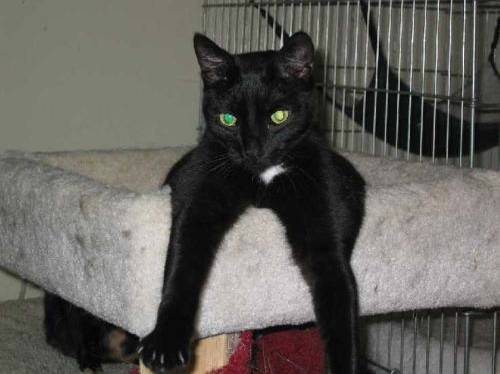

dog.4205.jpg Dog Confidence = 0.88211447 Took 0.389 Seconds


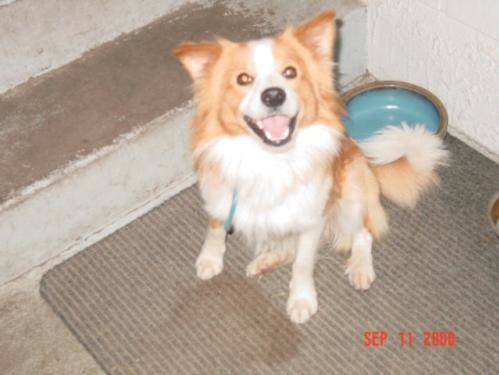

dog.8108.jpg Dog Confidence = 0.998473465 Took 0.416 Seconds


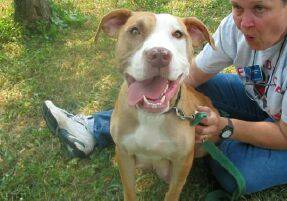

cat.252.jpg Cat Confidence = 0.974962533 Took 0.390 Seconds


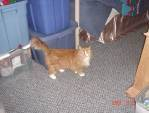

In [18]:
# Find the files
files_all = os.listdir(image_dir)
files_sample = random.sample(files_all, IMAGE_COUNT)

for file_name in files_sample:
    
    # Get the image data
    full_file_name = image_dir + "/" + file_name
    in_file = open(full_file_name)
    file_data = in_file.read()
    in_file.close()
    
    # Encode and create request
    file_base64_string = base64 \
                .b64encode(file_data) \
                .decode('ascii')
    req_data = REQ_TEMPLATE.replace("REQUEST_DATA", file_base64_string)
    
    # Call the Google API
    start_time = time.time()
    resp = requests.post(END_POINT, data=req_data, headers=HEADERS)
    end_time = time.time()
    resp.raise_for_status()
    
    # Pull out the response data and print it
    prediction = resp.json()["predictions"][0]
    print file_name, prediction["displayNames"][0], \
           "Confidence =",prediction["confidences"][0], \
           "Took", '{:5.3f}'.format(end_time - start_time), "Seconds"
    
    
    #Show the image
    display(Image(full_file_name))